In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(50)


def simulation(K,N):
    #Number of pick-up points
    M=1
    #The average front-and-back distance between taxis(Unit:m)
    L=5.3
    #The average left-and-right distance between taxis(Unit:m)
    W=2.5
    #Number of simulations
    simulation_number=1000
    #Average speed of movement of the taxi (Unit:m/s)
    mean_taxi_speed=5
    #Average speed of movement of the passenger(Unit:m/s)
    mean_passenger_speed=1
    #Average number of passengers on the taxi
    mean_passengers_on_taxi=3
    #Average departure time interval of passengers at the pick- up point (Unit:s)
    mean_passenger_departure_interval=2
    #Average time it takes for passengers to place their personal belongings and get on the taxis(Unit:s)
    mean_passenger_place_time=5

    #Store all the simulation table
    simulation_table=[]
    #Store the average taxi_taking time for each batch
    total=[]
    total_passenger=[]
    for i in range(simulation_number):
        R_list=[]
        walking_time_list=[]
        Tf_list=[]
        speed_list=[]
        inter_departure_time_list=[]
        walking_distance_list=[]
        count=0
        car_number=[]

        for k in range(K):
            for n in range(N):
                R=-1
                while(R<=0):
                    #number of passengers on the taxi
                    R=np.random.poisson(mean_passengers_on_taxi)
                R_list.append(R)
                count+=1
                for r in range(R):
                    #speed of movement of the passenger(Unit:m/s)
                    passenger_speed=np.random.normal(mean_passenger_speed,0.1)
                    walking_distance=np.abs((N+1)/2-(n+1))*L+(K-(k+1))*W
                    walking_time=walking_distance/passenger_speed
                    #time it takes for passengers to place their personal belongings and get on the taxis(Unit:s)
                    Tf=np.random.exponential(mean_passenger_place_time)
                    #inter-departure time
                    t=np.random.exponential(mean_passenger_departure_interval)

                    speed_list.append(passenger_speed)
                    walking_distance_list.append(walking_distance)
                    walking_time_list.append(walking_time)
                    Tf_list.append(Tf)
                    inter_departure_time_list.append(t)  
                    car_number.append(count)

        #speed of movement of the taxi (Unit:m/s)
        taxi_speed=np.random.normal(mean_taxi_speed)
        #The time it takes for taxis to move n units of car length distance 
        Tn=m*n*L/taxi_speed

        customer=[i for i in range(1,sum(R_list)+1)]
        departure_time=[0 for i in range(sum(R_list))]
        get_on_taxis=[0 for i in range(sum(R_list))]

        departure_time[0]=inter_departure_time_list[0]+Tn
        get_on_taxis[0]=departure_time[0]+ walking_time_list[0]+Tf_list[0]

        for i in range(1,sum(R_list)):
            departure_time[i]=inter_departure_time_list[i]+departure_time[i-1]
            get_on_taxis[i]=departure_time[i]+ walking_time_list[i]+Tf_list[i]

        #Create a simulation table for one batch as a dataframe
        df=pd.DataFrame(columns=['Customer ID','Car ID','Inter-Departure Time','Departure Time','Walking Distance','Passenger Speed','Walking Time','Placing Time','Boarding Time'])
        df['Customer ID']=customer
        df['Car ID']=car_number
        df['Inter-Departure Time']=inter_departure_time_list
        df['Departure Time']=departure_time
        df['Walking Distance']=walking_distance_list
        df['Passenger Speed']=speed_list
        df['Walking Time']=walking_time_list
        df['Placing Time']=Tf_list
        df['Boarding Time']=get_on_taxis
        simulation_table.append(df)
        average_time_one_batch=max(get_on_taxis)/(M*N*K) 
        average_time_passenger=max(get_on_taxis)/len(customer)
        total.append(average_time_one_batch)
        total_passenger.append(average_time_passenger)
    total_average_time=round(sum(total)/simulation_number,5)
    total_average_passenger=round(sum(total_passenger)/simulation_number,5)
    return total_average_time,total_average_passenger

if __name__=='__main__':
        #Number of lanes
        K=1
        #Number of taxis in each lane
        N=10
        total_average_time,total_average_passenger=simulation(K,N)
        print('The total average taxi-taking time :',total_average_time)
        print('The total average passenger waiting time:',total_average_passenger)

Text(0, 0.5, 'Average taxis queuing time')

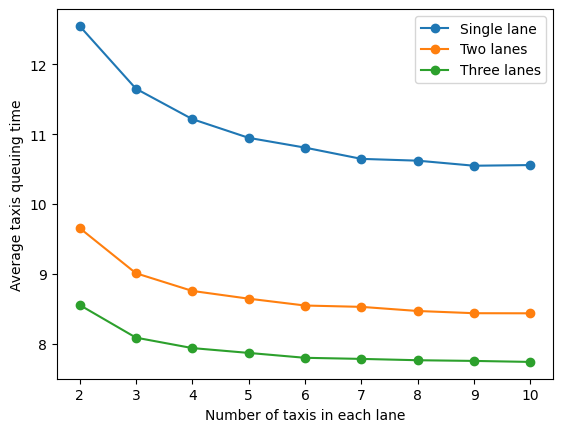

In [285]:
n=[2,3,4,5,6,7,8,9,10]
table1=[12.54873,11.65063,11.21566,10.94759,10.80777,10.64676,10.62097,10.54866,10.55821]
table2=[9.65789,9.0107,8.75759,8.64687,8.54883,8.52963,8.47058,8.43889,8.43748]
table3=[8.55712,8.08941,7.94008,7.87081,7.8009,7.78527,7.76612,7.75633,7.74199]

plt.plot(n,table1,marker='o')
plt.plot(n,table2,marker='o')
plt.plot(n,table3,marker='o')
plt.legend(('Single lane','Two lanes','Three lanes'))
plt.xlabel("Number of taxis in each lane")
plt.xticks(n)
plt.ylabel("Average taxis queuing time")

Text(0, 0.5, 'Average passenger queuing time')

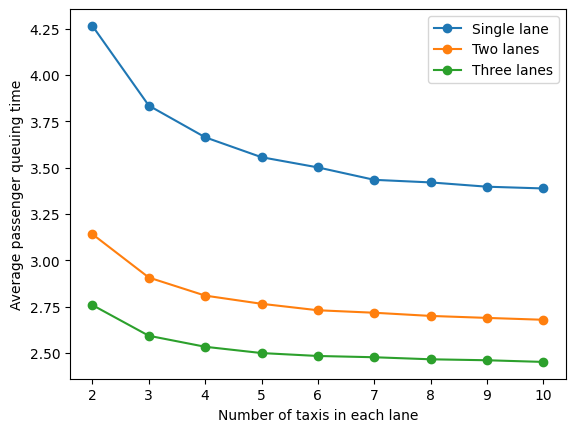

In [320]:
n=[2,3,4,5,6,7,8,9,10]
table4=[4.26468,3.8346,3.6636,3.55607,3.50098,3.43397,3.41999,3.39687,3.38746]
table5=[3.14049,2.90663,2.80903,2.76488,2.72996,2.71656,2.69938,2.68872,2.67859]
table6=[2.75782,2.59228,2.53289,2.49897,2.48321,2.47637,2.46531,2.46011,2.45112]

plt.plot(n,table4,marker='o')
plt.plot(n,table5,marker='o')
plt.plot(n,table6,marker='o')
plt.legend(('Single lane','Two lanes','Three lanes'))
plt.xlabel("Number of taxis in each lane")
plt.xticks(n)
plt.ylabel("Average passenger queuing time")

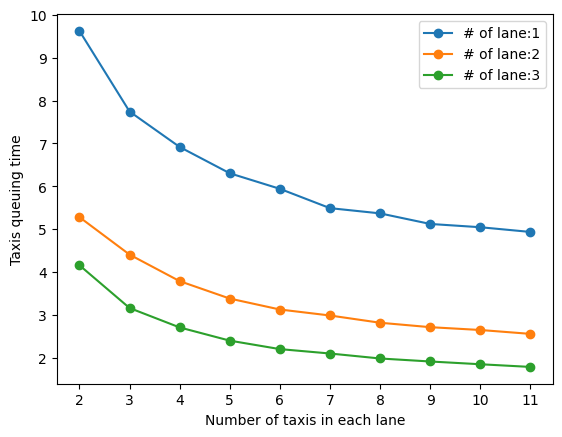

In [323]:
#The average front-and-back distance between taxis(Unit:m)
L=5.3
#The average left-and-right distance between taxis(Unit:m)
W=2.5
#Number of simulations
simulation_number=1000
#Average speed of movement of the taxi (Unit:m/s)
mean_taxi_speed=5
#Average speed of movement of the passenger(Unit:m/s)
mean_passenger_speed=1
#Average number of passengers on the taxi
mean_passengers_on_taxi=3
#Average departure time interval of passengers at the pick- up point (Unit:s)
mean_passenger_departure_interval=2
#Average time it takes for passengers to place their personal belongings and get on the taxis(Unit:s)
mean_passenger_place_time=5


def generate_random_number():
    #speed of movement of the taxi (Unit:m/s)
    taxi_speed=np.random.normal(mean_taxi_speed)
    #speed of movement of the passenger(Unit:m/s)
    passenger_speed=np.random.normal(mean_passenger_speed,0.1)
    #number of passengers on the taxi
    R=np.random.poisson(mean_passengers_on_taxi)
    #departure interval of passengers(Unit:s)
    t=np.random.exponential(mean_passenger_departure_interval)
    #time it takes for passengers to place their personal belongings and get on the taxis(Unit:s)
    Tf=np.random.exponential(mean_passenger_place_time)
    return taxi_speed,passenger_speed,R,t,Tf
    
def total_time_one_batch(taxi_speed,R,t,passenger_speed,Tf,n,k):
    #The time it takes for taxis to move n units of car length distance 
    Tn=m*n*L/taxi_speed
    #queuing time of the passenger farthest from the taxi 
    queuing_time=(2*R-1)*t
    #walking time of the passenger farthest from the taxi
    walking_time=((n-1)*L/2+W*(k-1))/passenger_speed
    total_time=Tn+queuing_time+walking_time+Tf
    return total_time

def main():
    #Number of pick-up points
    M=1
    #Number of lanes
    K=[1,2,3]
    #Number of taxis in each lane
    N=[2,3,4,5,6,7,8,9,10,11]
    for k in K:
        average_list=[]
        for n in N:
            average=[]
            for i in range(simulation_number):
                taxi_speed,passenger_speed,R,t,Tf=generate_random_number()
                total_time=total_time_one_batch(taxi_speed,R,t,passenger_speed,Tf,n,k)
                average_time=total_time/(m*n*k)
                average.append(average_time)
            average_list.append(sum(average)/simulation_number)
        plt.plot(N,average_list,marker='o')
        plt.legend(('# of lane:1','# of lane:2','# of lane:3'))
        plt.xlabel("Number of taxis in each lane")
        plt.xticks(N)
        plt.ylabel("Taxis queuing time")
main()